# Othello Game Development Planification

## Overview

### Introduction 📖
Othello, also known as Reversi, is a classic two-player strategy board game played on an 8x8 grid. Despite its simple rules, the game offers deep tactical complexity.

### Objective 🏆
The goal is to have the majority of disks showing your color on the board when the game ends.

### Game Components 🧩
    1 Board: An 8x8 grid of squares.
    2 Disks: Pieces that are black on one side and white on the other.

### Starting Position 🎯

The game begins with four disks placed in the center of the board in a specific pattern:

    . Row 4, Column 4: White (W ⚪)
    . Row 4, Column 5: Black (B ⚫)
    . Row 5, Column 4: Black (B ⚫)
    . Row 5, Column 5: White (W ⚪)


### Basic Rules 📝
#### Gameplay Turns 🔄
    . Players alternate turns, with Black typically going first.
    . On your turn, you must place a disk with your color facing up.
#### Capturing Mechanism 🎯
    . You capture opponent disks by flanking them in a straight line (horizontal, vertical, or diagonal).
    . All of the opponent's disks between your new disk and another of your disks are flipped to your color.
#### Valid Moves ✅
    . A move is valid if it results in at least one opponent disk being captured.
    . If a player has no valid moves, they pass their turn.
#### Game End 🏁
    . The game ends when neither player can make a valid move (usually when the board is full).
    . The player with the most disks of their color on the board wins.


### Additional Resources 📚

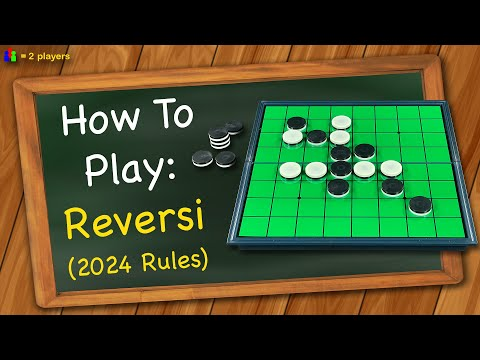

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('4XdyAZhzJW8', width=800, height=450)

## Designing the Game Architecture 🛠️✨

### 0️⃣ **Discussion on Coding Challenges 🤔**



 - In this section, we'll discuss the challenges of coding the Othello game and plan our code architecture to facilitate easy transitions between different interfaces (terminal to Pygame) and game modes (two-player to single-player against an AI). 
 - 🚨 Our goal is to create a modular and reusable codebase that can adapt to future enhancements with minimal changes 🚨


### 1️⃣ **Model-View-Controller (MVC) Pattern**

To keep things neat and tidy, we'll use the MVC pattern:

- **Model** 🗃️: Manages data and game logic (like the board state and rules).
- **View** 👀: Handles what the user sees (terminal or Pygame interface).
- **Controller** 🎮: Acts as the go-between for the Model and View, processing input and updating the Model.

**Why This Rocks:**

- **Separation of Concerns**: Changing the UI won't mess up our game logic.
- **Reusability**: We can reuse the Model and Controller when we switch interfaces.
- **Scalability**: Easy to add cool new features like AI players later on.


### 2️⃣ **Class Definitions**

#### **a. Board Class** 📋


- **What It Does**:

  - Keeps track of the game board state.
  - Provides methods to set up, update, and display the board.
  - Checks for valid moves and if the game is over.

- **Attributes**:

  - `grid`: The 2D array representing the board.
  - `size`: Board dimensions (we'll go with the standard 8x8).

- **Methods**:

  - `initialize()`: Sets up the starting position. Placing the first four pieces
  - `place_disk(row, col, color)`: Places a disk on the board. Method reused for each move
  - `is_valid_move(row, col, color)`: Checks if a move is legit. Method called before applying a move. Return a bool that will be handle in the workflow
  - `flip_disks(row, col, color)`: Flips the opponent's disks. After a move, disk to be switched will be computed, this method update their value
  - `get_valid_moves(color)`: Lists all valid moves for a player.
  - `is_game_over()`: Checks if the game's finished.
  - `count_disks()`: Tallies up the disks for scoring.
  - `compute_valid_moves()`: Instead of checking if the move if valid, we could also compute all the valide one and render them
  - `are_valid_moves_available()`: A bool used to end or not the game. Could be a utils function.

#### **b. Player Class (Abstract Base Class)** 🧑‍🤝‍🧑


- **What It Does**:

  - Represents a player.
  - Provides an interface for making moves.

- **Attributes**:

  - `color`: Disk color (`B` or `W`).
  - `name`: Player's name.

- **Methods**:

  - `make_move(board)`: Abstract method to make a move.

#### **c. HumanPlayer Class (Subclass of Player)** 👤



- **What It Does**:

  - Handles input from a human player.

- **Methods**:

  - `make_move(board)`: Prompts the user for input and makes a move.






#### **d. AIPlayer Class (Subclass of Player)** 🤖




- **What It Does**:

  - Implements AI to decide moves.

- **Attributes**:

  - `difficulty`: How smart the AI is (e.g., easy, medium, hard).

- **Methods**:

  - `make_move(board)`: Calculates the best move using AI algorithms (like Minimax).

#### **e. GameEngine Class** ⚙️



- **What It Does**:

  - Manages the overall game flow.
  - Handles turns and enforces rules.
  - Bridges the players and the board.

- **Attributes**:

  - `board`: An instance of the Board class.
  - `players`: A list containing two Player instances.
  - `current_player_index`: Keeps track of whose turn it is.

- **Methods**:

  - `start_game()`: Kicks off the game loop.
  - `switch_player()`: Swaps turns between players.
  - `process_move()`: Handles move execution and checks validity.
  - `end_game()`: Wraps up the game and announces the winner.


#### **f. View Classes** 🖼️



To make switching interfaces a breeze, we'll have separate View classes:

- **TerminalView Class** 💻

  - **What It Does**:

    - Renders the board in the terminal.
    - Handles user input from the console.

  - **Methods**:

    - `display_board(board)`: Prints the board.
    - `get_user_input()`: Gets input from the user.

- **PygameView Class** 🎨

  - **What It Does**:

    - Renders the board graphically with Pygame.
    - Handles user input via mouse or keyboard.

  - **Methods**:

    - `display_board(board)`: Shows the board using Pygame.
    - `get_user_input()`: Captures events from Pygame.


#### **f. Pion Classes** ♟️


A class used to play with the rendering method. Probably linked to the view rendering class

### 3️⃣ **Decoupling Game Logic from Interface** 🔗



By keeping our game logic separate from the UI, we can:

- **Easily Swap Interfaces**: Move from terminal to Pygame without changing the core logic.
- **Keep Things Consistent**: The Board and GameEngine stay the same, no matter how we display them.


### 4️⃣ **Handling Different Game Modes** 🎮



#### **Two-Player Mode** 👥

- Both players are instances of `HumanPlayer`.
- They take turns making moves.

#### **Single-Player Mode Against AI** 🆚🤖

- One player is a `HumanPlayer`, and the other is an `AIPlayer`.
- The game runs just like before, but the AI makes its own moves.


## Schematics ✏️

### Overview 📌